# Weekend Challenge

In [1]:
from OFDM import *

Read data file

In [2]:
received_data = pd.read_csv("gr5file.csv", header=None, delimiter=r"\s+")
received_data = received_data.values[0]

Read channel file

In [3]:
channel_data = pd.read_csv("gr5channel.csv", header=None, delimiter=r"\s+")
channel_data = channel_data.values[0]

Setup OFDM with given DFT size, CP and modulation

In [4]:
wc = CamG(1024, 32, "QPSK")

Channel Data

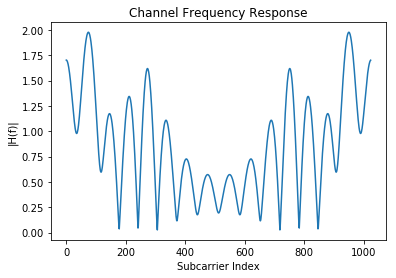

In [5]:
H = np.fft.fft(channel_data, wc.K)
plt.plot(wc.all_carriers, abs(H))
plt.title("Channel Frequency Response")
plt.xlabel("Subcarrier Index")
plt.ylabel("|H(f)|")

Remove cyclic Prefix

In [6]:
received_data_p = received_data.reshape(-1,1056)

received_no_cp = wc.remove_cp(received_data_p)
received_no_cp.shape

(350, 1024)

Compute DFT and equalise using channel coefficients

In [7]:
OFDM_demod = FFT(received_no_cp)
OFDM_demod.shape

(350, 1024)

Only take symbols 1-511 (is this the right thing to do??)

Demap the data using the min dist decision rule

In [8]:
symbols = equalise(OFDM_demod, H)
symbols = symbols[:,1:512]
symbols.shape

(350, 511)

In [9]:
data_P, decisions = wc.demap(symbols)
print(data_P.shape)

(350, 511, 2)


Convert parallel data to serial bit stream

In [17]:
data = wc.PS(data_P)
len(data)

357700

In [34]:
a = np.packbits(data)
print("".join([chr(item) for item in a]))

y5tv9o.wav 44612 RIFF<®  WAVEfmt      @ â@    LIST  (INFOISFT   LavF58.42.101 dataö¥  }}z}{}}|~|~{|zz|}|~~~||{}~~|s/|yzy{~|w}~}yw~uw~ltvnv~}~}|uty}~spo nX|¢lxrhyqnz|}úwyrvpynxwrrkw_uixvx^yw~|w|qz{~w~~t|wzw|vxz~y{z}{v{qw{jlt{zwx}wy}{}p}rr~omz~sw|v~{r|v~zzjy}zx|v{xv{{{{x}|s}{uxauz{w}s~Ak}|{y}~z}|{rs}{h}{vzv|~{}}w{tuv}{z{}y{xvsyu|>|}zx~z{~}yy||{rw|x|xz}|py}|y~{~v{q{{{zÂ|~|z~uyvw{o~zv}vwzO;x~|ux~|w}|vx}z|xxy|uvz|t~wt}vvwrz{w|~}}tlxxzy~zw||wwF{}y{uy}uw~y|{t~nw~|yyzwn|{w